# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [165]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [166]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [167]:
spaceship.shape

(8693, 14)

**Check for data types**

In [168]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [169]:
spaceship['VIP'] = spaceship['VIP'].astype(bool)

spaceship['CryoSleep'] = spaceship['CryoSleep'].astype(bool)

In [170]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [171]:
# Comprobar si hay valores nulos en todo el DataFrame
valores_nulos = spaceship.isnull().sum()

# Mostrar cuántos valores nulos tiene cada columna
print(valores_nulos)

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [172]:
spaceship = spaceship.dropna()

In [173]:
spaceship.shape

(6943, 14)

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [174]:
# Función para extraer la primera letra de la columna 'Cabin' y asignar categorías
def cabin_category(cabin):
    if isinstance(cabin, str) and '/' in cabin:
        # Extraemos la primera parte antes de la barra ('/')
        section = cabin.split('/')[0]
        
        # Asignar categorías basadas en la letra
        if section == 'A':
            return 'A'
        elif section == 'B':
            return 'B'
        elif section == 'C':
            return 'C'
        elif section == 'D':
            return 'D'
        elif section == 'E':
            return 'E'
        elif section == 'F':
            return 'F'
        elif section == 'G':
            return 'G'
        else:
            return 'T'  # Para valores que no coincidan
    return 'T'  # Si no es un valor válido, devolvemos 'T'

# Aplicamos la función a la columna 'Cabin'
spaceship['Cabin'] = spaceship['Cabin'].apply(cabin_category)

# Mostramos el dataframe con la nueva columna
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- Drop PassengerId and Name

In [175]:
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])

- For non-numerical columns, do dummies.

In [176]:
# Identificamos las columnas no numéricas
non_numeric_columns = ['HomePlanet', 'Cabin', 'Destination']

# Creamos las variables dummies para todas las columnas no numéricas
df_dummies = pd.get_dummies(spaceship, columns=non_numeric_columns, drop_first=True)

df_dummies

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,True,False,False,False,False,False,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,False,True,False,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,True,False,False,False,False,False,False,False,False,False,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,True,False,True,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,False,False,False,False,False,False,False,True,False,False,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,True,False,False,False,False,True,False,False,False,False,False


In [177]:
df_dummies.dtypes

CryoSleep                       bool
Age                          float64
VIP                             bool
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                     bool
HomePlanet_Europa               bool
HomePlanet_Mars                 bool
Cabin_B                         bool
Cabin_C                         bool
Cabin_D                         bool
Cabin_E                         bool
Cabin_F                         bool
Cabin_G                         bool
Cabin_T                         bool
Destination_PSO J318.5-22       bool
Destination_TRAPPIST-1e         bool
dtype: object

**Perform Train Test Split**

In [178]:
# Supongamos que 'df_dummies' es el dataframe ya procesado y con las variables dummies.

# Seleccionamos las variables (features) X y la variable objetivo (target) y
X = df_dummies.drop(columns=['Transported'])  # Eliminamos la columna objetivo del conjunto de características
y = df_dummies['Transported']  # Variable objetivo (si el pasajero fue transportado)

# Realizamos el split de los datos: 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [179]:
# Mostramos las dimensiones de los conjuntos resultantes
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (5554, 19)
Dimensiones de X_test: (1389, 19)
Dimensiones de y_train: (5554,)
Dimensiones de y_test: (1389,)


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

Accuracy del modelo KNN: 77.61%


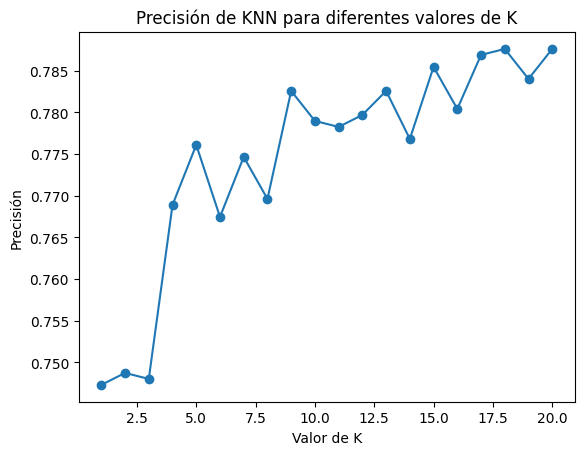

In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Supongamos que ya tienes X_train, X_test, y_train, y_test (después del train-test split)

# Definimos el modelo KNN con un valor de K (por ejemplo, K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamos el modelo con el conjunto de entrenamiento
knn.fit(X_train, y_train)

# Realizamos las predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluamos el rendimiento del modelo usando accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo KNN: {accuracy * 100:.2f}%")

# (Opcional) Visualización del rendimiento para diferentes valores de K
# Evaluar el rendimiento con diferentes valores de K
k_values = range(1, 21)  # Probaremos K de 1 a 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Graficamos el rendimiento en función de K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Precisión de KNN para diferentes valores de K')
plt.show()


- Evaluate your model's performance. Comment it

In [181]:
# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo KNN: {accuracy * 100:.2f}%")

Accuracy del modelo KNN: 78.76%


In [182]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[540 163]
 [132 554]]


In [183]:
from sklearn.metrics import classification_report

# Reporte de clasificación con precisión, recall y F1-score
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)


Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.80      0.77      0.79       703
        True       0.77      0.81      0.79       686

    accuracy                           0.79      1389
   macro avg       0.79      0.79      0.79      1389
weighted avg       0.79      0.79      0.79      1389



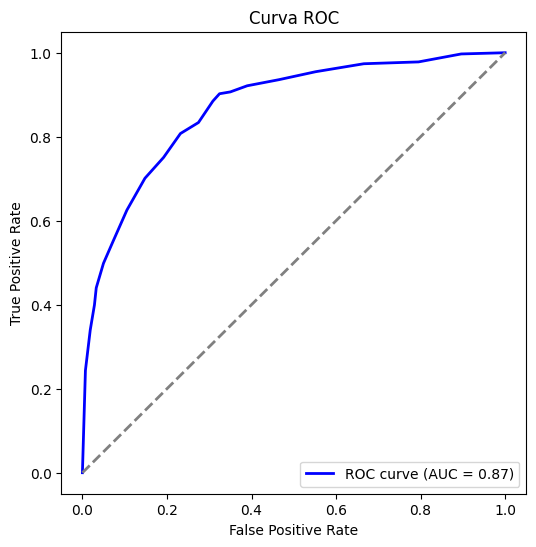

In [184]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos las probabilidades de predicción
y_prob = knn.predict_proba(X_test)[:, 1]  # Solo la probabilidad de la clase positiva

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficamos la Curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
